In [1]:
#import numpy as np

# # matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import matplotlib.gridspec as gridspec

# import seaborn as sns
# import pandas as pd

## Functions and colormap
#from PlottingWithFunction import * 
#from custom_colormap import soft_colormap_v2

# from astropy.convolution import convolve, Gaussian2DKernel

In [2]:
%run run_all_intro_stuff.py

In [3]:
vector_angle_actual_same_length_astronomy

[1.3369638,
 0.6297511,
 0.52095085,
 0.2140624,
 0.68580914,
 0.6499472,
 0.39625013,
 -0.15006542,
 -0.8566493,
 0.9534418,
 0.85386366,
 0.8244843,
 0.91411275,
 -1.2455575,
 -1.1368543,
 1.5157524,
 1.2961943,
 1.2087765,
 1.090679,
 1.062999,
 0.992919,
 1.4436594,
 -1.5482017,
 1.5166707,
 1.5466708,
 1.540417,
 1.2156607,
 1.0814557,
 0.9758318,
 1.0533775,
 1.3219626,
 1.2446615,
 -1.4096838,
 -1.1519303,
 -1.1892815,
 1.0917506,
 0.88774896,
 0.8621148,
 1.1300547,
 1.2951381,
 -0.8328258,
 0.09872209,
 0.6360539,
 0.95891273,
 0.5429513,
 -0.61864465]

In [4]:
# Define the list of ratios to use
ratios = [(1, 0), (0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4), (0.5, 0.5), 
          (0.4, 0.6), (0.3, 0.7), (0.2, 0.8), (0.1, 0.9), (0, 1)]

# Dictionary to store results
results = {}

# Loop through the ratios
for ratio1, ratio2 in ratios:
    
    # Run the function with the current ratio
    PA_grid, StokesQ_grid, StokesU_grid, vectors_data, vectors_angle = mix_StokesQU_and_generate_vectors(
        ratio1, ratio2, 
        StokesQ_grid_100Uniform, 
        StokesU_grid_100Uniform,
        StokesQ_grid_100Azimuthal, 
        StokesU_grid_100Azimuthal,
        ny, nx,
        step, vector_length_pix_const, 
        StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
        calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
        PolarizationAngle_err_data_2d_deg)
    
    # Create a key for the dictionary based on the ratio
    ratio_str = f"{int(ratio1 * 100)}{int(ratio2 * 100)}"  # e.g., "5050" for (0.5, 0.5)
    
    
    # Save the results in the dictionary
    results[f"PA_grid_{ratio_str}"] = PA_grid
    results[f"StokesQ_grid_{ratio_str}"] = StokesQ_grid
    results[f"StokesU_grid_{ratio_str}"] = StokesU_grid
    results[f"vectors_data_{ratio_str}"] = vectors_data
    results[f"vectors_angle_{ratio_str}"] = vectors_angle

In [5]:
PA_grid_100U_0A, StokesQ_grid_100U_0A, StokesU_grid_100U_0A, vectors_data_100U_0A_cartesian, vectors_angle_100U_0A_rad_astronomy = (results["PA_grid_1000"], results["StokesQ_grid_1000"], results["StokesU_grid_1000"], results["vectors_data_1000"], results["vectors_angle_1000"])
PA_grid_90U_10A, StokesQ_grid_90U_10A, StokesU_grid_90U_10A, vectors_data_90U_10A_cartesian, vectors_angle_90U_10A_rad_astronomy = (results["PA_grid_9010"], results["StokesQ_grid_9010"], results["StokesU_grid_9010"], results["vectors_data_9010"], results["vectors_angle_9010"])
PA_grid_80U_20A, StokesQ_grid_80U_20A, StokesU_grid_80U_20A, vectors_data_80U_20A_cartesian, vectors_angle_80U_20A_rad_astronomy = (results["PA_grid_8020"], results["StokesQ_grid_8020"], results["StokesU_grid_8020"], results["vectors_data_8020"], results["vectors_angle_8020"])
PA_grid_70U_30A, StokesQ_grid_70U_30A, StokesU_grid_703U_0A, vectors_data_70U_30A_cartesian, vectors_angle_70U_30A_rad_astronomy = (results["PA_grid_7030"], results["StokesQ_grid_7030"], results["StokesU_grid_7030"], results["vectors_data_7030"], results["vectors_angle_7030"])
PA_grid_60U_40A, StokesQ_grid_60U_40A, StokesU_grid_60U_40A, vectors_data_60U_40A_cartesian, vectors_angle_60U_40A_rad_astronomy = (results["PA_grid_6040"], results["StokesQ_grid_6040"], results["StokesU_grid_6040"], results["vectors_data_6040"], results["vectors_angle_6040"])
PA_grid_50U_50A, StokesQ_grid_50U_50A, StokesU_grid_50U_50A, vectors_data_50U_50A_cartesian, vectors_angle_50U_50A_rad_astronomy = (results["PA_grid_5050"], results["StokesQ_grid_5050"], results["StokesU_grid_5050"], results["vectors_data_5050"], results["vectors_angle_5050"])
PA_grid_40U_60A, StokesQ_grid_40U_60A, StokesU_grid_40U_60A, vectors_data_40U_60A_cartesian, vectors_angle_40U_60A_rad_astronomy = (results["PA_grid_4060"], results["StokesQ_grid_4060"], results["StokesU_grid_4060"], results["vectors_data_4060"], results["vectors_angle_4060"])
PA_grid_30U_70A, StokesQ_grid_30U_70A, StokesU_grid_30U_70A, vectors_data_30U_70A_cartesian, vectors_angle_30U_70A_rad_astronomy = (results["PA_grid_3070"], results["StokesQ_grid_3070"], results["StokesU_grid_3070"], results["vectors_data_3070"], results["vectors_angle_3070"])
PA_grid_20U_80A, StokesQ_grid_20U_80A, StokesU_grid_20U_80A, vectors_data_20U_80A_cartesian, vectors_angle_20U_80A_rad_astronomy = (results["PA_grid_2080"], results["StokesQ_grid_2080"], results["StokesU_grid_2080"], results["vectors_data_2080"], results["vectors_angle_2080"])
PA_grid_10U_90A, StokesQ_grid_10U_90A, StokesU_grid_10U_90A, vectors_data_10U_90A_cartesian, vectors_angle_10U_90A_rad_astronomy = (results["PA_grid_1090"], results["StokesQ_grid_1090"], results["StokesU_grid_1090"], results["vectors_data_1090"], results["vectors_angle_1090"])
PA_grid_0U_100A, StokesQ_grid_0U_100A, StokesU_grid_0U_100A, vectors_data_0U_100A_cartesian, vectors_angle_0U_100A_rad_astronomy = (results["PA_grid_0100"], results["StokesQ_grid_0100"], results["StokesU_grid_0100"], results["vectors_data_0100"], results["vectors_angle_0100"])

In [6]:
# Assign data to each subplot
kinda_real_data_list = [
    PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy,  # Top row
    StokesQ_grid_100Uniform,        StokesQ_grid_50U_50A,           StokesQ_grid_100Azimuthal,       # Middle row
    StokesU_grid_100Uniform,        StokesU_grid_50U_50A,            StokesU_grid_100Azimuthal       # Bottom row   
]

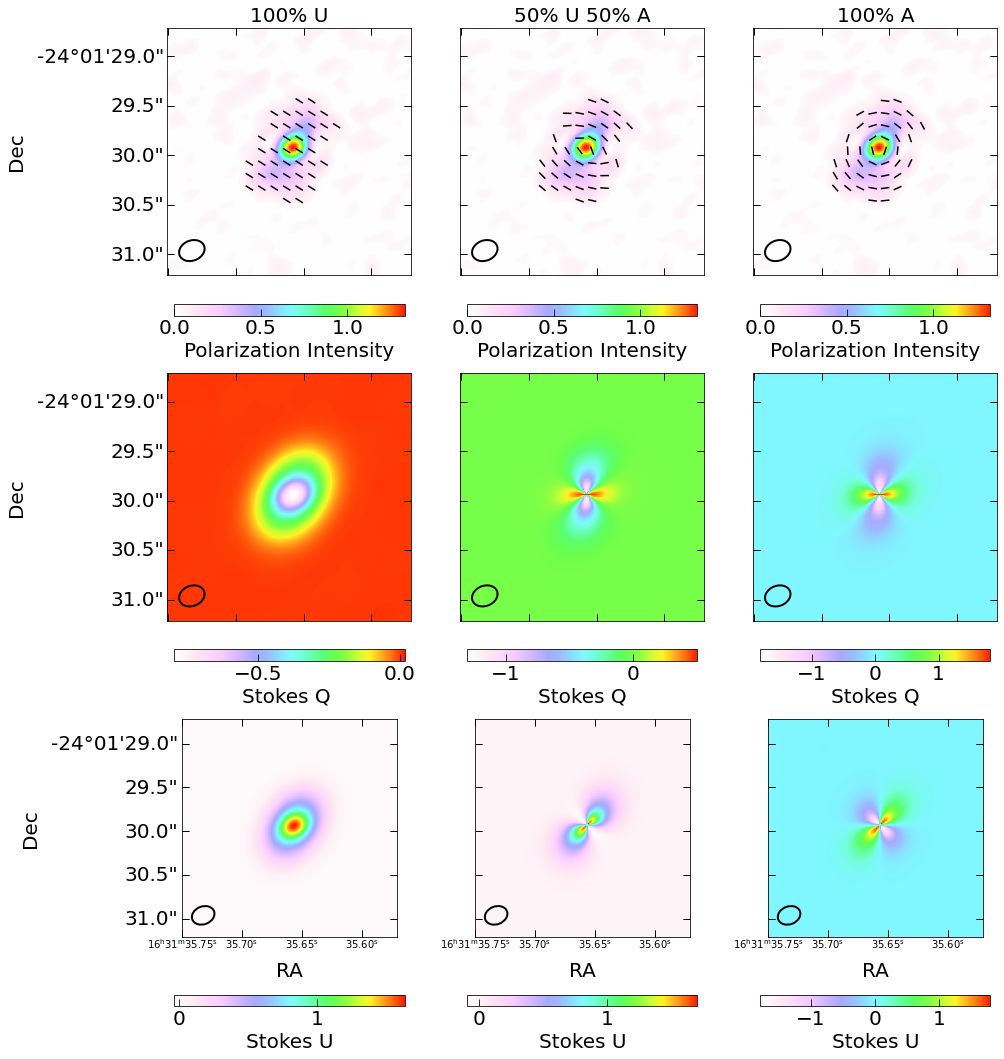

In [7]:
# Example usage
axes = plot_grids(kinda_real_data_list, soft_colormap_v2, StokesI_wcs, axis_label_fs, axis_num_fs, cbar_fs, 
                  xmin, xmax, ymin, ymax, BMAJ_pix, BMIN_pix, BPA_deg_cartesian)  # Store returned axes

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_uniform_cartesian:
    axes[0, 0].plot([row[0], row[1]], [row[2], row[3]], color='black')

for row in vectors_data_50U_50A_cartesian:
    axes[0, 1].plot([row[0], row[1]], [row[2], row[3]], color='black')

# Plot vector data on the third subplot (axes[0, 2])
for row in vector_data_azimuthal_cartesian:
    axes[0, 2].plot([row[0], row[1]], [row[2], row[3]], color='black')



In [8]:
# Assign data to each subplot
kinda_real_data_list_with_actual = [
    PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy, # Top row
    StokesQ_data_2d_mJy,            StokesQ_grid_100Uniform,        StokesQ_grid_50U_50A,           StokesQ_grid_100Azimuthal,      # Middle row
    StokesU_data_2d_mJy,            StokesU_grid_100Uniform,        StokesU_grid_50U_50A,           StokesU_grid_100Azimuthal       # Bottom row   
]

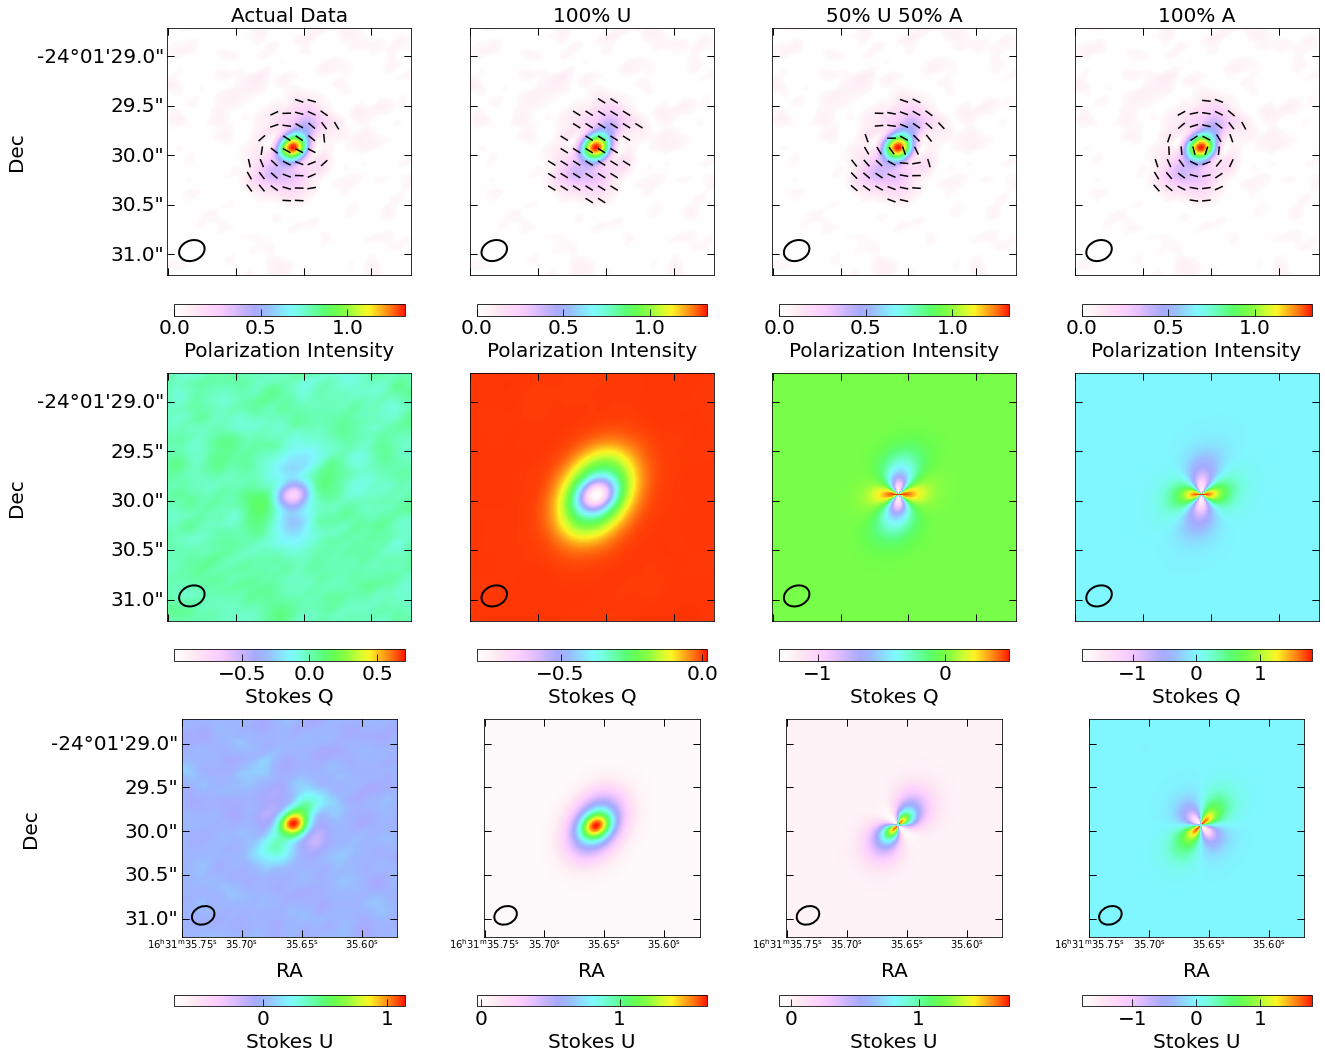

In [9]:
# Example usage
axes = plot_grids_4x3(kinda_real_data_list_with_actual, soft_colormap_v2, StokesI_wcs, axis_label_fs, axis_num_fs, cbar_fs, 
                  xmin, xmax, ymin, ymax, BMAJ_pix, BMIN_pix, BPA_deg_cartesian)  # Store returned axes

for row in vector_data_actual_same_length_cartesian:
    axes[0, 0].plot([row[0], row[1]], [row[2], row[3]], color='black')

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_uniform_cartesian:
    axes[0, 1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_50U_50A_cartesian:
    axes[0, 2].plot([row[0], row[1]], [row[2], row[3]], color='black')

# Plot vector data on the third subplot (axes[0, 2])
for row in vector_data_azimuthal_cartesian:
    axes[0, 3].plot([row[0], row[1]], [row[2], row[3]], color='black')


# Ratio Plots

In [10]:
# Adding titles to each subplot
ratio_titles = [
    "100% Uniform 0% Azimuthal", "0% Uniform 100% Azimuthal", 
    "90% Uniform 10% Azimuthal", "10% Uniform 90% Azimuthal",
    "80% Uniform 20% Azimuthal", "20% Uniform 80% Azimuthal",
    "70% Uniform 30% Azimuthal", "30% Uniform 70% Azimuthal",
    "60% Uniform 40% Azimuthal", "40% Uniform 60% Azimuthal",
    "50% Uniform 50% Azimuthal", "50% Uniform 50% Azimuthal"
]

In [11]:
vector_data_list = [
    vectors_data_100U_0A_cartesian, vectors_data_0U_100A_cartesian,
    vectors_data_90U_10A_cartesian, vectors_data_10U_90A_cartesian,
    vectors_data_80U_20A_cartesian, vectors_data_20U_80A_cartesian,
    vectors_data_70U_30A_cartesian, vectors_data_30U_70A_cartesian,
    vectors_data_60U_40A_cartesian, vectors_data_40U_60A_cartesian,
    vectors_data_50U_50A_cartesian, vectors_data_50U_50A_cartesian
]


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


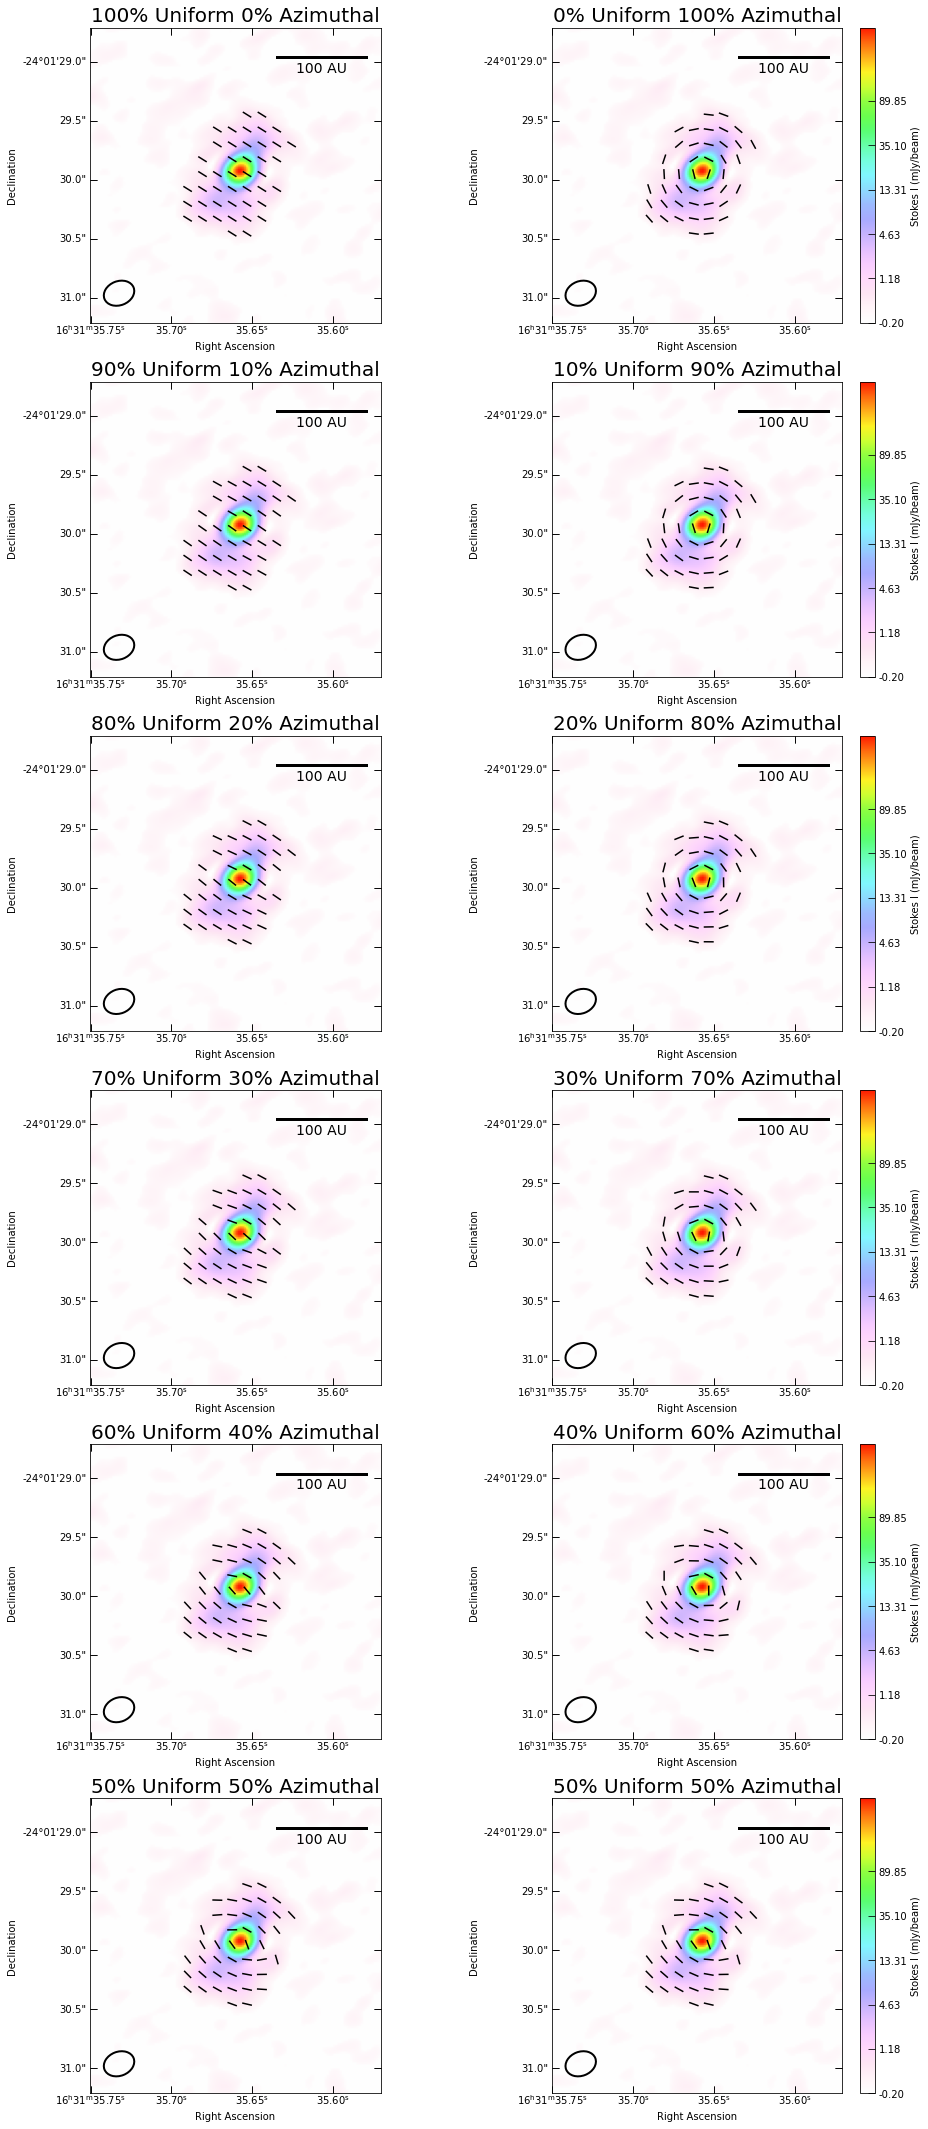

In [12]:
# Set the horizontal gap between subplots
fig, axes = plt.subplots(6, 2, figsize=(20, 38), constrained_layout=True, 
                         subplot_kw={'projection': StokesI_wcs},
                         gridspec_kw={'wspace': -0.75})  # Adjust this value for horizontal gap
for i in range(6):
    for j in range(2):
        ax = axes[i, j]  # Select the appropriate subplot
        create_blank_grid(i, j, 0.5, ax, PolarizedIntensity_data_2d_mJy, 
                          StokesI_wcs, StokesI_stretched, soft_colormap_v2, 
                          normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                          xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                          text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                          BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                          max_length_pix, reference_fraction)


# Loop to create blank grids and plot vectors
for i in range(6):
    for j in range(2):
        ax = axes[i, j]  # Select the appropriate subplot

        ax.set_title(ratio_titles[i*2 + j], fontsize = 20)  # Set title for each subplot

for row in vectors_data_100U_0A_cartesian:
    axes[0,0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_90U_10A_cartesian:
    axes[1,0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_80U_20A_cartesian:
    axes[2,0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_70U_30A_cartesian:
    axes[3,0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_60U_40A_cartesian:
    axes[4,0].plot([row[0], row[1]], [row[2], row[3]], color='black')

for row in vectors_data_50U_50A_cartesian:
    axes[5,0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
    
    
    
    
for row in vectors_data_0U_100A_cartesian:
    axes[0,1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_10U_90A_cartesian:
    axes[1,1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_20U_80A_cartesian:
    axes[2,1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_30U_70A_cartesian:
    axes[3,1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_40U_60A_cartesian:
    axes[4,1].plot([row[0], row[1]], [row[2], row[3]], color='black')

for row in vectors_data_50U_50A_cartesian:
    axes[5,1].plot([row[0], row[1]], [row[2], row[3]], color='black')

    
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


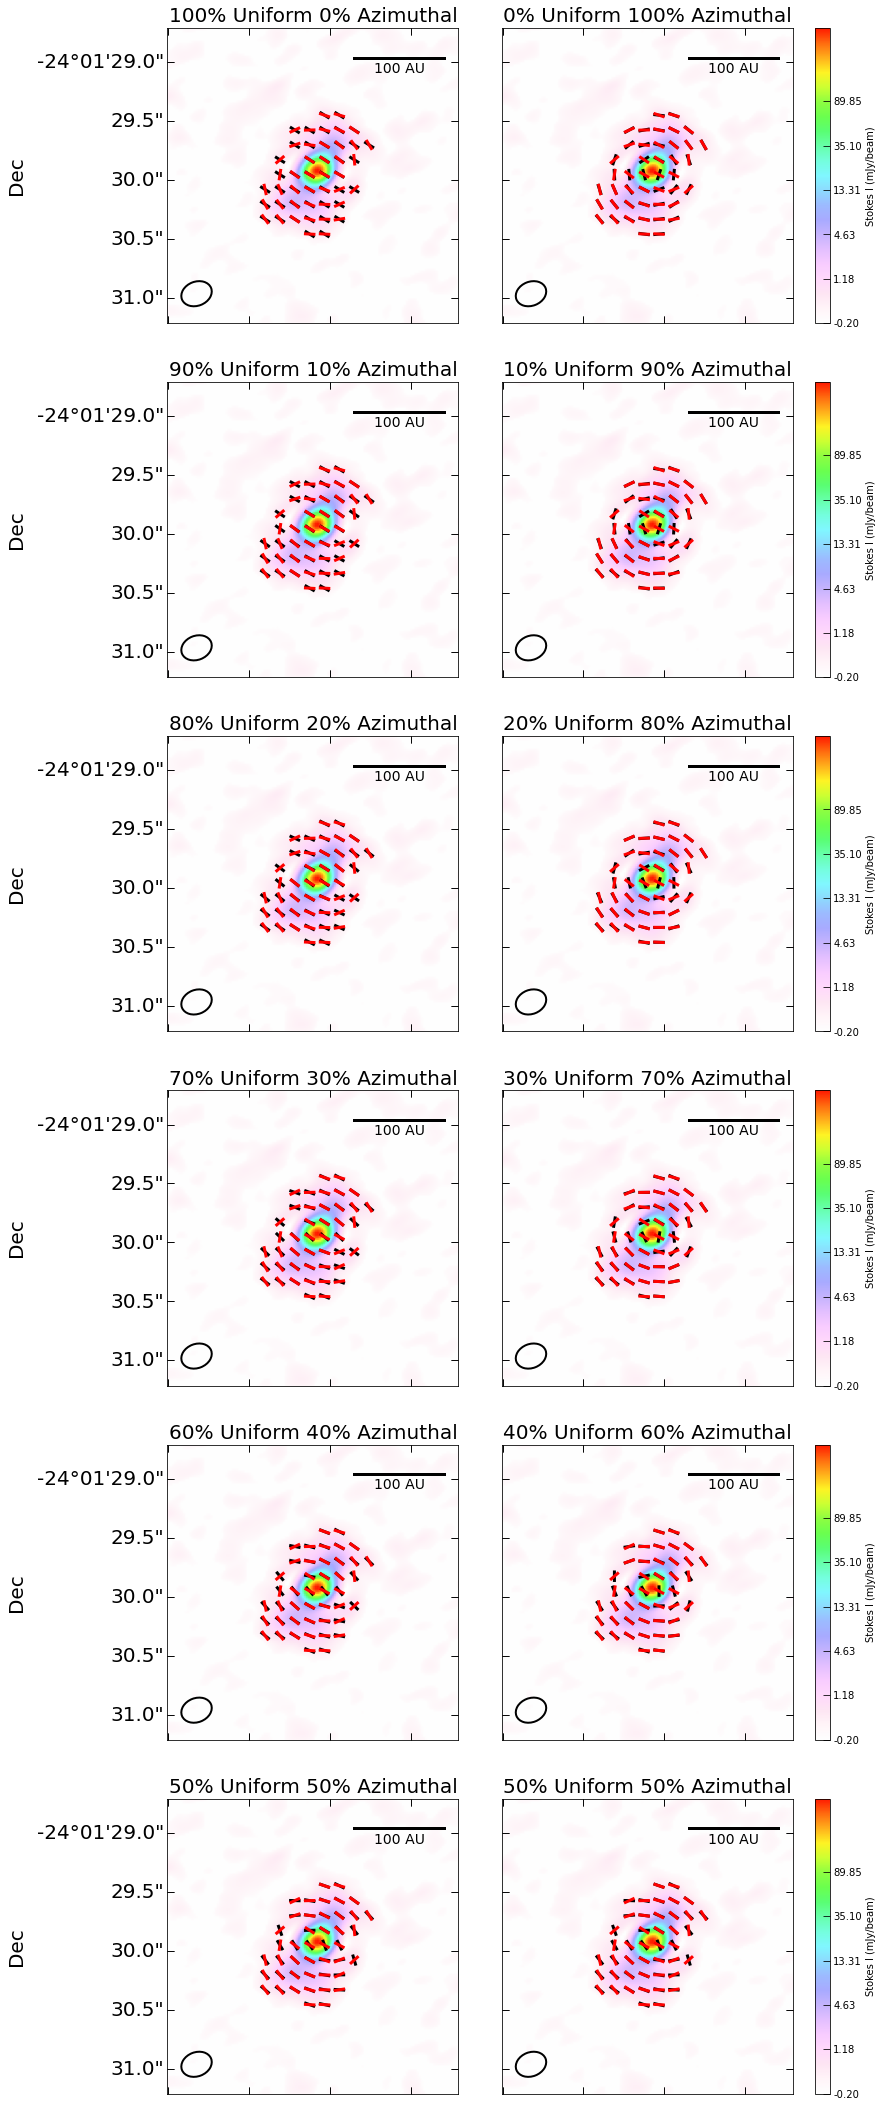

In [13]:
# Define the figure and subplots
nrows, ncols = 6, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 38), constrained_layout=True, 
                         subplot_kw={'projection': StokesI_wcs},
                         gridspec_kw={'wspace': -1})


# Loop through subplots
for i, ax in enumerate(axes.flat):
    if i >= len(ratio_titles):
        ax.axis("off")  # Hide empty subplots if there is extra space
        continue
    
    # Create blank grid
    row, col = divmod(i, ncols)
    create_blank_grid(row, col, 0.5, ax, PolarizedIntensity_data_2d_mJy, 
                      StokesI_wcs, StokesI_stretched, soft_colormap_v2, 
                      normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                      xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                      text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                      BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                      max_length_pix, reference_fraction)
    
    ax.set_title(ratio_titles[i], fontsize=20)
    
    # Add vector plots
    for row in vector_data_list[i]:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 3, label = 'Model')
        
    # Plot vector data on the first subplot (axes[0, 0])
    for row in vector_data_actual_same_length_cartesian:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 3, label = 'Real')
    
    # Set axis labels and ticks
    if col == 0:
        ax.set_ylabel('Dec', fontsize=axis_label_fs)
        ax.tick_params(axis="y", which="both", left=True, labelleft=True)
    else:
        ax.tick_params(axis="y", which="both", left=True, labelleft=False)

    if row == nrows - 1:
        ax.set_xlabel('RA', fontsize=axis_label_fs)
        ax.tick_params(axis="x", which="both", bottom=True, labelbottom=True)
    else:
        ax.tick_params(axis="x", which="both", bottom=True, labelbottom=False)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.minorticks_on()
    ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs - 10)
    ax.tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.show()

# Comparing Model with Real Thing

To start I will just be comparing the angle of the vectors. 

If this does not work we can also compare Q and U and then do $\chi^2(Q)+\chi^2(U)$, (maybe $I$) and use a circle

$
\chi ^2 = \Sigma \frac{(O_i - E_i)^2}{E_i}
$

$\chi ^2$ = chi squared 

$O_i$ = observed value 

$E_i$ = expected value

## Trying all ratios compared to things

In [14]:
testing_vector_angles = [
    np.array(vectors_angle_100U_0A_rad_astronomy),  
    np.array(vectors_angle_90U_10A_rad_astronomy),
    np.array(vectors_angle_80U_20A_rad_astronomy), 
    np.array(vectors_angle_70U_30A_rad_astronomy), 
    np.array(vectors_angle_60U_40A_rad_astronomy), 
    np.array(vectors_angle_50U_50A_rad_astronomy), 
    np.array(vectors_angle_40U_60A_rad_astronomy), 
    np.array(vectors_angle_30U_70A_rad_astronomy), 
    np.array(vectors_angle_20U_80A_rad_astronomy),
    np.array(vectors_angle_10U_90A_rad_astronomy),
    np.array(vectors_angle_0U_100A_rad_astronomy)
]

## Compared to 100 U

In [15]:
expected_100U = np.array(vector_angle_uniform_astronomy)

In [16]:
testing_U_angles_rad_ast = [vectors_angle_100U_0A_rad_astronomy[0], expected_100U[0]]

In [17]:
testing_U_angles_rad_ast_labels = ['Observed', 'Expected']

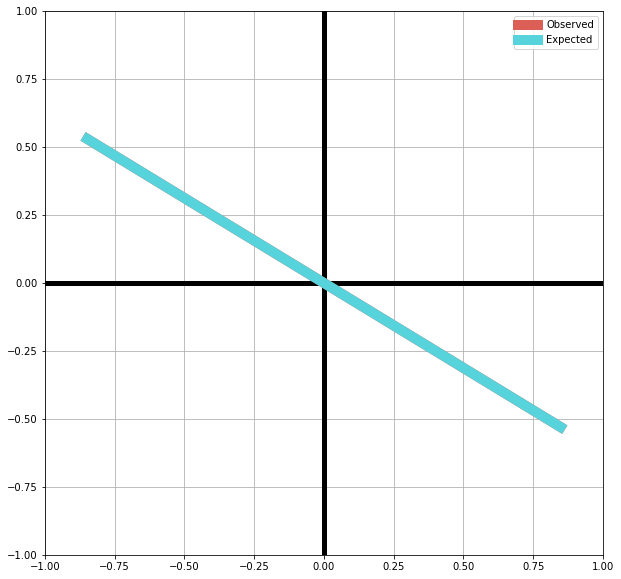

In [18]:
# Colors for each line 
colors = sns.color_palette("hls", len(testing_U_angles_rad_ast)) 

# Length of the lines (can be adjusted as needed)
line_length = 1

# Create the plot with a larger size
plt.figure(figsize=(10, 10))

# Set axis limits to show all four quadrants
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot the black axes at x=0 and y=0
plt.axvline(x=0, color='black', linestyle='-', lw=5)
plt.axhline(y=0, color='black', linestyle='-', lw=5)

# Loop through each angle and plot the corresponding colored line
for i, angle_rad in enumerate(testing_U_angles_rad_ast):
    # Convert angle from degrees to radians
    # angle_rad = np.radians(angle_deg)  # Use the angle in degrees for conversion to radians
    
    # Calculate the Cartesian coordinates for the line
    x = line_length * np.cos(angle_rad + np.pi / 2 )
    y = line_length * np.sin(angle_rad + np.pi / 2)
    
    # Plot the line from (0,0) to (x, y) using the color from the 'colors' array
    plt.plot([-x, x], [-y, y], color=colors[i], label=testing_U_angles_rad_ast_labels[i], lw=10)

# Add grid and legend to the plot
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [19]:
# Initialize an empty list to store Chi-squared values
#chi_squared_values_comp_100U = []
chi_squared_values_comp_100U_v2 = []

# Assuming minor_angle_rad_astronomy is the expected values for comparison
# Iterate through each of the testing vector angles
for vectors_angle in testing_vector_angles:
    # Observed vector angle
    observed = vectors_angle
    
    # Calculate Chi-squared for the observed and expected values (replace `expected_100U` with the correct expected value)
    #chi_squared = calculate_chi_squared(observed, expected_100U)
    chi_squared_v2 = calculate_chi_squared_v2(observed, expected_100U)
    
    # Append the calculated Chi-squared value to the list
    #chi_squared_values_comp_100U.append(chi_squared)
    chi_squared_values_comp_100U_v2.append(chi_squared_v2)

In [20]:
print(f'100 U 0 A: xi^2 = {chi_squared_values_comp_100U_v2[0]:.3f}')
print(f'90 U 10 A: xi^2 = {chi_squared_values_comp_100U_v2[1]:.3f}')
print(f'80 U 20 A: xi^2 = {chi_squared_values_comp_100U_v2[2]:.3f}')
print(f'70 U 30 A: xi^2 = {chi_squared_values_comp_100U_v2[3]:.3f}')
print(f'60 U 40 A: xi^2 = {chi_squared_values_comp_100U_v2[4]:.3f}')
print(f'50 U 50 A: xi^2 = {chi_squared_values_comp_100U_v2[5]:.3f}')
print(f'40 U 50 A: xi^2 = {chi_squared_values_comp_100U_v2[6]:.3f}')
print(f'30 U 60 A: xi^2 = {chi_squared_values_comp_100U_v2[7]:.3f}')
print(f'20 U 80 A: xi^2 = {chi_squared_values_comp_100U_v2[8]:.3f}')
print(f'10 U 90 A: xi^2 = {chi_squared_values_comp_100U_v2[9]:.3f}')
print(f'0 U 100 A: xi^2 = {chi_squared_values_comp_100U_v2[10]:.3f}')

100 U 0 A: xi^2 = 0.000
90 U 10 A: xi^2 = 0.069
80 U 20 A: xi^2 = 0.341
70 U 30 A: xi^2 = 0.991
60 U 40 A: xi^2 = 2.454
50 U 50 A: xi^2 = 6.749
40 U 50 A: xi^2 = 24.964
30 U 60 A: xi^2 = 26.015
20 U 80 A: xi^2 = 27.858
10 U 90 A: xi^2 = 32.889
0 U 100 A: xi^2 = 34.290


## Compared to 100 Azimuthal

In [21]:
expected_100A = np.array(vector_angle_azimuthal_astronomy)

In [22]:
fig, ax = create_base_plot(StokesI_wcs, StokesI_stretched, soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

for row in vector_data_azimuthal_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 8, label = 'Expected')
    
for row in vectors_data_0U_100A_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 5, label = 'Observed')

TypeError: create_base_plot() takes from 15 to 19 positional arguments but 20 were given

In [ ]:
(vectors_angle_0U_100A_rad_astronomy - expected_100A) * (180/np.pi)

In [ ]:
# Initialize an empty list to store Chi-squared values
#chi_squared_values_comp_100A = []
chi_squared_values_comp_100A_v2 = []

# Assuming minor_angle_rad_astronomy is the expected values for comparison
# Iterate through each of the testing vector angles
for vectors_angle in testing_vector_angles:
    # Observed vector angle
    observed = vectors_angle
    
    # Calculate Chi-squared for the observed and expected values (replace `expected_100A` with the correct expected value)
    #chi_squared = calculate_chi_squared(observed, expected_100A)
    chi_squared_v2 = calculate_chi_squared_v2(observed, expected_100A)
    
    # Append the calculated Chi-squared value to the list
    #chi_squared_values_comp_100A.append(chi_squared)
    chi_squared_values_comp_100A_v2.append(chi_squared_v2)

In [ ]:
print(f'100 U 0 A: xi^2 = {chi_squared_values_comp_100A_v2[0]:.3f}')
print(f'90 U 10 A: xi^2 = {chi_squared_values_comp_100A_v2[1]:.3f}')
print(f'80 U 20 A: xi^2 = {chi_squared_values_comp_100A_v2[2]:.3f}')
print(f'70 U 30 A: xi^2 = {chi_squared_values_comp_100A_v2[3]:.3f}')
print(f'60 U 40 A: xi^2 = {chi_squared_values_comp_100A_v2[4]:.3f}')
print(f'50 U 50 A: xi^2 = {chi_squared_values_comp_100A_v2[5]:.3f}')
print(f'40 U 50 A: xi^2 = {chi_squared_values_comp_100A_v2[6]:.3f}')
print(f'30 U 60 A: xi^2 = {chi_squared_values_comp_100A_v2[7]:.3f}')
print(f'20 U 80 A: xi^2 = {chi_squared_values_comp_100A_v2[8]:.3f}')
print(f'10 U 90 A: xi^2 = {chi_squared_values_comp_100A_v2[9]:.3f}')
print(f'0 U 100 A: xi^2 = {chi_squared_values_comp_100A_v2[10]:.3f}')

## Compared to 5050

In [ ]:
expected_5050 = vectors_angle_50U_50A_rad_astronomy

In [ ]:
# Initialize an empty list to store Chi-squared values
chi_squared_values_comp_5050 = []

# Assuming minor_angle_rad_astronomy is the expected values for comparison
# Iterate through each of the testing vector angles
for vectors_angle in testing_vector_angles:
    # Observed vector angle
    observed = vectors_angle
    
    # Calculate Chi-squared for the observed and expected values (replace `expected_100A` with the correct expected value)
    chi_squared = calculate_chi_squared_v2(observed, expected_5050)
    
    # Append the calculated Chi-squared value to the list
    chi_squared_values_comp_5050.append(chi_squared)

In [ ]:
print(f'100 U 0 A: xi^2 = {chi_squared_values_comp_5050[0]:.3f}')
print(f'90 U 10 A: xi^2 = {chi_squared_values_comp_5050[1]:.3f}')
print(f'80 U 20 A: xi^2 = {chi_squared_values_comp_5050[2]:.3f}')
print(f'70 U 30 A: xi^2 = {chi_squared_values_comp_5050[3]:.3f}')
print(f'60 U 40 A: xi^2 = {chi_squared_values_comp_5050[4]:.3f}')
print(f'50 U 50 A: xi^2 = {chi_squared_values_comp_5050[5]:.3f}')
print(f'40 U 50 A: xi^2 = {chi_squared_values_comp_5050[6]:.3f}')
print(f'30 U 60 A: xi^2 = {chi_squared_values_comp_5050[7]:.3f}')
print(f'20 U 80 A: xi^2 = {chi_squared_values_comp_5050[8]:.3f}')
print(f'10 U 90 A: xi^2 = {chi_squared_values_comp_5050[9]:.3f}')
print(f'0 U 100 A: xi^2 = {chi_squared_values_comp_5050[10]:.3f}')

## Compared to real

In [ ]:
np.degrees(vector_angle_actual_same_length_astronomy)

In [ ]:
expected_real = vector_angle_actual_same_length_astronomy

In [ ]:
# Initialize an empty list to store Chi-squared values
chi_squared_values_comp_real = []

# Assuming minor_angle_rad_astronomy is the expected values for comparison
# Iterate through each of the testing vector angles
for vectors_angle in testing_vector_angles:
    # Observed vector angle
    observed = vectors_angle
    
    # Calculate Chi-squared for the observed and expected values (replace `expected_100A` with the correct expected value)
    chi_squared = calculate_chi_squared_v2(observed, expected_real)
    
    # Append the calculated Chi-squared value to the list
    chi_squared_values_comp_real.append(chi_squared)

In [ ]:
# Labels for each case
labels = [
    "100 U 0 A", "90 U 10 A", "80 U 20 A", "70 U 30 A", "60 U 40 A",
    "50 U 50 A", "40 U 60 A", "30 U 70 A", "20 U 80 A", "10 U 90 A", "0 U 100 A"
]

# Find the index of the minimum chi-squared value
min_index = chi_squared_values_comp_real.index(min(chi_squared_values_comp_real))

# Print all values
for label, chi in zip(labels, chi_squared_values_comp_real):
    print(f'{label}: xi^2 = {chi:.3f}')

# Print the one with the lowest chi-squared value
print(f'\nThe lowest chi-squared value is for {labels[min_index]}: xi^2 = {chi_squared_values_comp_real[min_index]:.3f}')


# Make a Big Plot of the best data

In [ ]:
import matplotlib.patches as patches

In [ ]:
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, soft_colormap_no_red, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add vector plots
for row in vector_data_list[min_index]:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 5, label = 'Best Model')

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 5, label = 'Real')

In [ ]:
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add vector plots
for row in vector_data_list[min_index]:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 5, label = 'Best Model')

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 5, label = 'Real')
    
# Define the center of the ellipse
ellipse_center = (RA_centre_pix, Dec_centre_pix)

# Define the semi-major and semi-minor axes in pixels
semi_minor_axis = 10  # Major axis length (half of the total major diameter)
semi_major_axis = 15  # Minor axis length (half of the total minor diameter)

# Create an ellipse patch
ellipse = patches.Ellipse(
    ellipse_center, 
    width=2 * semi_minor_axis,  # Full major axis length
    height=2 * semi_major_axis,  # Full minor axis length
    angle= - major_angle_deg_cartesian ,  
    edgecolor='blue', 
    facecolor='none', 
    linestyle='dashed', 
    linewidth=2
)

# Add the ellipse to the plot
ax.add_patch(ellipse)
